In [1]:
# Import the pandas library as pd
import pandas as pd

try:
    #In order not to use(try except): Set warn_bad_lines to issue warnings about bad records
    # Read 'police.csv' into a DataFrame named ri
    ri = pd.read_csv('../input/dataset-of-traffic-stops-in-rhode-island/police.csv')
                     
    # Examine the head of the DataFrame
    print(ri.head())

except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")

    stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02     01:55          NaN             M          1985.0   
1  2005-01-18     08:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome is_arrested stop_duration  drugs_related_stop  
0         NaN       Citation       False      0-15 

Before beginning our analysis, it's important that we familiarize ourself with the dataset.
I'll read the dataset into pandas, examine the first few rows,
and then count the number of missing values.

In [5]:
print(ri.shape)

(91741, 15)


In [2]:
# Count the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64


Often, a DataFrame will contain columns that are not useful to our analysis. 
Such columns should be dropped from the DataFrame, to make it easier for me to focus on the remaining columns.

I'll drop the `county_name` column because it only contains missing values. 

Thus, this column can be dropped because they contain no useful information.
The number of missing values in each column has been printed to the console for you.

In [6]:
print(ri.shape)

# Drop the 'county_name' column
ri.drop('county_name', axis=1, inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 14)


Dropping rows
When i know that a specific column will be critical to your analysis,
and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

The `driver_gender` column will be critical to many of your analyses. 
Because only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.

In [7]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame (again)
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw            1
driver_age              293
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83210
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64
(86406, 14)


##### 2-second step is convert the types of columns to the suitable type

Fixing a data type
We saw that the is_arrested column currently has the object data type. 
we'll change the data type to bool, which is the most suitable type for a column containing True and False values.

Fixing the data type will enable us to use mathematical operations on the is_arrested column that would not be possible otherwise.

In [8]:
print(ri.dtypes)

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object


In [9]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

bool


Combining object columns
Currently, the date and time of each traffic stop are stored in separate object columns: `stop_date` and `stop_time`.

I'll combine these two columns into a single column, and then convert it to datetime format.

In [10]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time , sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object


In [11]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-18 08:15:00',
               '2005-01-23 23:15:00', '2005-02-20 17:15:00',
               '2005-03-14 10:00:00', '2005-03-23 09:45:00',
               '2005-04-01 17:30:00', '2005-06-06 13:20:00',
               '2005-07-13 10:15:00', '2005-07-13 15:45:00',
               ...
               '2015-12-31 16:38:00', '2015-12-31 19:44:00',
               '2015-12-31 19:55:00', '2015-12-31 20:20:00',
               '2015-12-31 20:25:00', '2015-12-31 20:27:00',
               '2015-12-31 20:35:00', '2015-12-31 20:45:00',
               '2015-12-31 21:42:00', '2015-12-31 22:46:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86406, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')


Examining traffic violations
Before comparing the violations being committed by each gender,
you should examine the violations committed by all drivers to get a baseline understanding of the data.

I'll count the unique values in the violation column, and then separately express those counts as proportions.

In [12]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())
print('')
print(ri.violation.value_counts().sum())
print('')
# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48461
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

86406

Speeding               0.560852
Moving violation       0.187765
Equipment              0.127537
Other                  0.049962
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64


Comparing violations by gender
The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In [13]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender=='F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))
print('')

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))


Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64


Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact 
on whether the driver will receive a ticket or a warning.

First, i'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, i'll use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warnin

In [14]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F')& (ri.violation=='Speeding' )]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M')& (ri.violation=='Speeding' )]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952590
Warning             0.039917
Arrest Driver       0.005361
N/D                 0.000840
Arrest Passenger    0.000840
No Action           0.000452
Name: stop_outcome, dtype: float64
Citation            0.946208
Warning             0.035265
Arrest Driver       0.015161
Arrest Passenger    0.001243
N/D                 0.001061
No Action           0.001061
Name: stop_outcome, dtype: float64


Calculating the search rate
During a traffic stop, the police officer sometimes conducts a search of the vehicle.
I'll calculate the percentage of all stops in the ri DataFrame that result in a vehicle search, also known as the search rate.

In [15]:
# Check the data type of 'search_conducted '
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963012
True     0.036988
Name: search_conducted, dtype: float64
0.036988172117677014


In [16]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64


Adding a second factor to the analysis
Even though the search rate for males is much higher than for females,
it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type,
and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation.
If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation.
Find out below if that's the case!

In [17]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64


In [18]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64


In [19]:
ri.search_type.unique()

array([nan, 'Incident to Arrest,Protective Frisk', 'Probable Cause',
       'Incident to Arrest', 'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Reasonable Suspicion', 'Inventory', 'Inventory,Protective Frisk',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Inventory,Probable Cause',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Probable Cause,Protective Frisk',
       'Inventory,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable Cause,Reasonable Suspicion',

Counting protective frisks
During a vehicle search, the police officer may pat down the driver to check if they have a weapon.
This is known as a "protective frisk."

I'll first check to see how many times "Protective Frisk" was the only search type.
Then,i'll use a string method to locate all instances in which the driver was frisked.

In [20]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Fris

In [21]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)
ri.inventory.sum()

439

Comparing frisk rates by gender
I'll compare the rates at which female and male drivers are frisked during a search.
Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data,
namely stops in which a search was conducted.

In [22]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.08573216520650813
driver_gender
F    0.061571
M    0.089908
Name: frisk, dtype: float64


### Time series analysis 

In [23]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,inventory
stop_datetime,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,False
2005-01-18 08:15:00,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,False
2005-01-23 23:15:00,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,False
2005-02-20 17:15:00,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,False,False
2005-03-14 10:00:00,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,False


Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest.
This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ri DataFrame. 
Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight

12 = noon

23 = 11 PM

In [24]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
print(hourly_arrest_rate)

0.03389810892762077
stop_datetime
0     0.047393
1     0.061428
2     0.062914
3     0.053221
4     0.074074
5     0.031915
6     0.014045
7     0.013498
8     0.020449
9     0.024703
10    0.025278
11    0.027037
12    0.032999
13    0.030100
14    0.032716
15    0.032307
16    0.030765
17    0.032757
18    0.043988
19    0.031506
20    0.041048
21    0.053795
22    0.043397
23    0.042825
Name: is_arrested, dtype: float64


I'll create a line plot from the hourly_arrest_rate object.
A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help me to spot some trends that may not have been obvious when examining the raw numbers!

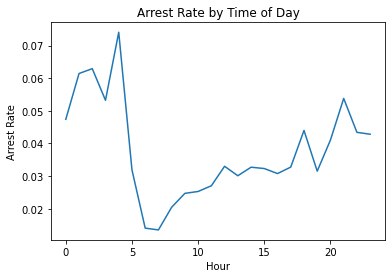

In [25]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [26]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.007186
2006-12-31    0.005818
2007-12-31    0.007524
2008-12-31    0.006993
2009-12-31    0.011607
2010-12-31    0.008721
2011-12-31    0.008449
2012-12-31    0.010870
2013-12-31    0.011858
2014-12-31    0.013335
2015-12-31    0.010448
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


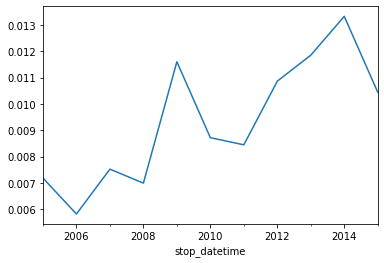

In [27]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

#### Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. 
I'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop.
I'll calculate the annual drug rate by resampling this column,
and then I'll use a line plot to visualize how the rate has changed over time.

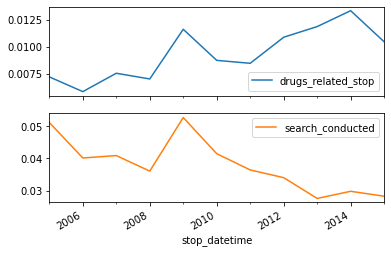

In [28]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')
# Create subplots from 'annual'
annual.plot(subplots=True)
plt.show()

In [29]:
# Create a frequency table of driver race and driver gender
table = pd.crosstab(ri.driver_race,ri.driver_gender)
print(table)

driver_gender      F      M
driver_race                
Asian            513   1746
Black           2580   9664
Hispanic        1871   7636
Other             26    214
White          18521  43635


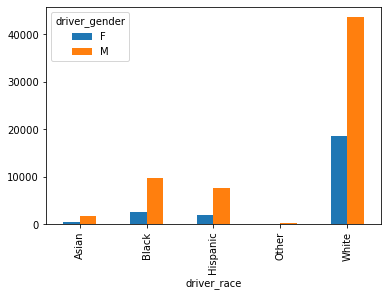

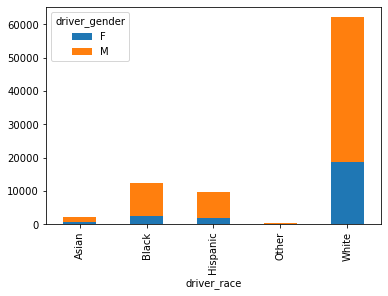

In [30]:
# Create a bar plot of 'table'
table.plot(kind='bar')
table.plot(kind='bar',stacked=True)
# Display the plot
plt.show()

In [31]:
ri.is_arrested.dtype

dtype('bool')

In [32]:
search_rate=ri.groupby('violation').search_conducted.mean()
print(search_rate)

violation
Equipment              0.063884
Moving violation       0.055165
Other                  0.048645
Registration/plates    0.097319
Seat belt              0.032520
Speeding               0.019748
Name: search_conducted, dtype: float64


In [33]:
#to make it more easier to read 
search_rate.sort_values()

violation
Speeding               0.019748
Seat belt              0.032520
Other                  0.048645
Moving violation       0.055165
Equipment              0.063884
Registration/plates    0.097319
Name: search_conducted, dtype: float64

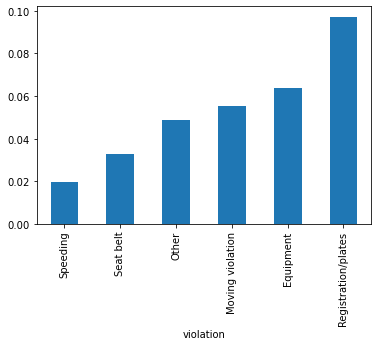

In [34]:
search_rate.sort_values().plot(kind='bar')
plt.show()

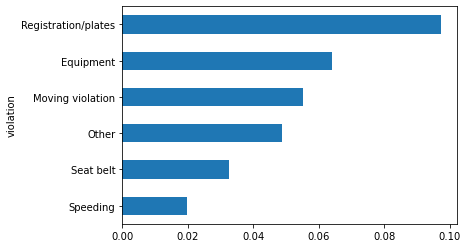

In [35]:
search_rate.sort_values().plot(kind='barh')
plt.show()